In [1]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 1)                 31        
                                                                 
Total params: 5,981
Trainable params: 5,981
Non-trainable params: 0
_________________________________________________________________


C:\Users\zvjan\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\zvjan\AppData\Local\Temp\ipykernel_10320\3480116103.py:88: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat,1)
C:\Users\zvjan\AppData\Local\Temp\ipykernel_10320\3480116103.py:95: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = application_df.drop(["IS_SUCCESSFUL"],1).values


Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5717 - accuracy: 0.7226
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5556 - accuracy: 0.7312
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5532 - accuracy: 0.7296
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5510 - accuracy: 0.7318
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5498 - accuracy: 0.7333
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5491 - accuracy: 0.7335
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5481 - accuracy: 0.7338
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5472 - accuracy: 0.7352
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5473 - accuracy: 0.7333
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5464 - accura

804/804 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.7405
Epoch 82/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5372 - accuracy: 0.7402
Epoch 83/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5371 - accuracy: 0.7399
Epoch 84/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7410
Epoch 85/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.7410
Epoch 86/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5368 - accuracy: 0.7413
Epoch 87/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5371 - accuracy: 0.7409
Epoch 88/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5367 - accuracy: 0.7404
Epoch 89/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5370 - accuracy: 0.7403
Epoch 90/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5366 - accuracy: 

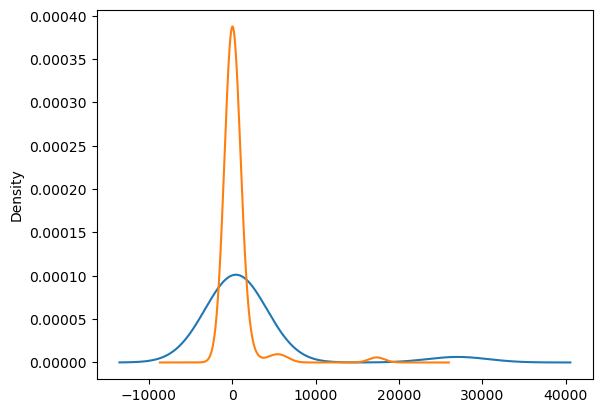

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df


# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df=application_df.drop(["EIN", "NAME"], axis=1)
application_df.head()

# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
application_df.APPLICATION_TYPE.value_counts()

application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
application_counts.plot.density()

# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
application_df.CLASSIFICATION.value_counts()

classification_counts = application_df.CLASSIFICATION.value_counts()
application_counts

# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density()

# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE

replace_classification= list(classification_counts[classification_counts < 1800].index)

# Replace in dataframe
for cls in replace_classification:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE

encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE

application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE

y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))


# Check the structure of the model
nn.summary()

# Compile the model
#  YOUR CODE GOES HERE
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
#  YOUR CODE GOES HERE
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")



In [3]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
785/804 [============================>.] - ETA: 0s - loss: 0.5374 - accuracy: 0.7402
Epoch 1: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5368 - accuracy: 0.7407
Epoch 2/100
794/804 [============================>.] - ETA: 0s - loss: 0.5366 - accuracy: 0.7406
Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5360 - accuracy: 0.7411
Epoch 3/100
803/804 [============================>.] - ETA: 0s - loss: 0.5360 - accuracy: 0.7410
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5360 - accuracy: 0.7410
Epoch 4/100
774/804 [===========================>..] - ETA: 0s - loss: 0.5359 - accuracy: 0.7419
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5360 - accuracy: 0.7415
Epoch 5/100
785/804 [=======================

801/804 [============================>.] - ETA: 0s - loss: 0.5351 - accuracy: 0.7414
Epoch 35: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5350 - accuracy: 0.7414
Epoch 36/100
788/804 [============================>.] - ETA: 0s - loss: 0.5354 - accuracy: 0.7409
Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5348 - accuracy: 0.7412
Epoch 37/100
781/804 [============================>.] - ETA: 0s - loss: 0.5353 - accuracy: 0.7404
Epoch 37: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5348 - accuracy: 0.7413
Epoch 38/100
800/804 [============================>.] - ETA: 0s - loss: 0.5350 - accuracy: 0.7405
Epoch 38: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5350 - accuracy: 0.7407
Epoch 39/100
790/804 [===========================

776/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7419
Epoch 69: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5342 - accuracy: 0.7417
Epoch 70/100
788/804 [============================>.] - ETA: 0s - loss: 0.5345 - accuracy: 0.7412
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5343 - accuracy: 0.7418
Epoch 71/100
801/804 [============================>.] - ETA: 0s - loss: 0.5348 - accuracy: 0.7418
Epoch 71: saving model to checkpoints\weights.71.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5345 - accuracy: 0.7420
Epoch 72/100
773/804 [===========================>..] - ETA: 0s - loss: 0.5327 - accuracy: 0.7419
Epoch 72: saving model to checkpoints\weights.72.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5339 - accuracy: 0.7411
Epoch 73/100
801/804 [===========================

In [4]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 1s - loss: 0.5602 - accuracy: 0.7257 - 690ms/epoch - 3ms/step
Loss: 0.5602171421051025, Accuracy: 0.7257142663002014


In [5]:
nn_new.save("trained_attrition.h5")

In [6]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model, Increase number of Erochs
fit_model = nn.fit(X_train_scaled,y_train,epochs=500,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/500
791/804 [============================>.] - ETA: 0s - loss: 0.5347 - accuracy: 0.7417
Epoch 1: saving model to checkpoints\weights.01.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5346 - accuracy: 0.7419
Epoch 2/500
802/804 [============================>.] - ETA: 0s - loss: 0.5341 - accuracy: 0.7416
Epoch 2: saving model to checkpoints\weights.02.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5338 - accuracy: 0.7418
Epoch 3/500
773/804 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7424
Epoch 3: saving model to checkpoints\weights.03.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5338 - accuracy: 0.7421
Epoch 4/500
780/804 [============================>.] - ETA: 0s - loss: 0.5324 - accuracy: 0.7434
Epoch 4: saving model to checkpoints\weights.04.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5336 - accuracy: 0.7422
Epoch 5/500
773/804 [=======================

799/804 [============================>.] - ETA: 0s - loss: 0.5370 - accuracy: 0.7417
Epoch 35: saving model to checkpoints\weights.35.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5365 - accuracy: 0.7421
Epoch 36/500
778/804 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7421
Epoch 36: saving model to checkpoints\weights.36.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5332 - accuracy: 0.7425
Epoch 37/500
779/804 [============================>.] - ETA: 0s - loss: 0.5326 - accuracy: 0.7425
Epoch 37: saving model to checkpoints\weights.37.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.7421
Epoch 38/500
800/804 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7425
Epoch 38: saving model to checkpoints\weights.38.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5330 - accuracy: 0.7423
Epoch 39/500
794/804 [===========================

793/804 [============================>.] - ETA: 0s - loss: 0.5328 - accuracy: 0.7422
Epoch 69: saving model to checkpoints\weights.69.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5336 - accuracy: 0.7427
Epoch 70/500
801/804 [============================>.] - ETA: 0s - loss: 0.5336 - accuracy: 0.7421
Epoch 70: saving model to checkpoints\weights.70.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5334 - accuracy: 0.7423
Epoch 71/500
798/804 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7419
Epoch 71: saving model to checkpoints\weights.71.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5332 - accuracy: 0.7422
Epoch 72/500
781/804 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7427
Epoch 72: saving model to checkpoints\weights.72.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7425
Epoch 73/500
775/804 [===========================

779/804 [============================>.] - ETA: 0s - loss: 0.5328 - accuracy: 0.7417
Epoch 103: saving model to checkpoints\weights.103.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5324 - accuracy: 0.7424
Epoch 104/500
786/804 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7436
Epoch 104: saving model to checkpoints\weights.104.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5325 - accuracy: 0.7427
Epoch 105/500
800/804 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7421
Epoch 105: saving model to checkpoints\weights.105.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5324 - accuracy: 0.7421
Epoch 106/500
801/804 [============================>.] - ETA: 0s - loss: 0.5328 - accuracy: 0.7424
Epoch 106: saving model to checkpoints\weights.106.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5331 - accuracy: 0.7423
Epoch 107/500
793/804 [===============

804/804 [==============================] - 2s 2ms/step - loss: 0.5322 - accuracy: 0.7424
Epoch 137/500
784/804 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7431
Epoch 137: saving model to checkpoints\weights.137.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5320 - accuracy: 0.7423
Epoch 138/500
799/804 [============================>.] - ETA: 0s - loss: 0.5322 - accuracy: 0.7425
Epoch 138: saving model to checkpoints\weights.138.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5318 - accuracy: 0.7428
Epoch 139/500
793/804 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7427
Epoch 139: saving model to checkpoints\weights.139.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7425
Epoch 140/500
798/804 [============================>.] - ETA: 0s - loss: 0.5322 - accuracy: 0.7425
Epoch 140: saving model to checkpoints\weights.140.hdf5
804/804 [===============

797/804 [============================>.] - ETA: 0s - loss: 0.5325 - accuracy: 0.7424
Epoch 170: saving model to checkpoints\weights.170.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7427
Epoch 171/500
802/804 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.7423
Epoch 171: saving model to checkpoints\weights.171.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5317 - accuracy: 0.7423
Epoch 172/500
774/804 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.7427
Epoch 172: saving model to checkpoints\weights.172.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5316 - accuracy: 0.7429
Epoch 173/500
787/804 [============================>.] - ETA: 0s - loss: 0.5320 - accuracy: 0.7431
Epoch 173: saving model to checkpoints\weights.173.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5321 - accuracy: 0.7427
Epoch 174/500
786/804 [===============

804/804 [==============================] - 1s 2ms/step - loss: 0.5317 - accuracy: 0.7423
Epoch 204/500
802/804 [============================>.] - ETA: 0s - loss: 0.5319 - accuracy: 0.7426
Epoch 204: saving model to checkpoints\weights.204.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5316 - accuracy: 0.7427
Epoch 205/500
778/804 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7430
Epoch 205: saving model to checkpoints\weights.205.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5310 - accuracy: 0.7428
Epoch 206/500
782/804 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7418
Epoch 206: saving model to checkpoints\weights.206.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5324 - accuracy: 0.7427
Epoch 207/500
791/804 [============================>.] - ETA: 0s - loss: 0.5309 - accuracy: 0.7428
Epoch 207: saving model to checkpoints\weights.207.hdf5
804/804 [===============

776/804 [===========================>..] - ETA: 0s - loss: 0.5316 - accuracy: 0.7428
Epoch 237: saving model to checkpoints\weights.237.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5312 - accuracy: 0.7432
Epoch 238/500
799/804 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7428
Epoch 238: saving model to checkpoints\weights.238.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5311 - accuracy: 0.7428
Epoch 239/500
775/804 [===========================>..] - ETA: 0s - loss: 0.5315 - accuracy: 0.7426
Epoch 239: saving model to checkpoints\weights.239.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7428
Epoch 240/500
778/804 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7422
Epoch 240: saving model to checkpoints\weights.240.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5314 - accuracy: 0.7423
Epoch 241/500
803/804 [===============

804/804 [==============================] - 2s 2ms/step - loss: 0.5309 - accuracy: 0.7428
Epoch 271/500
795/804 [============================>.] - ETA: 0s - loss: 0.5321 - accuracy: 0.7428
Epoch 271: saving model to checkpoints\weights.271.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5323 - accuracy: 0.7427
Epoch 272/500
783/804 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.7434
Epoch 272: saving model to checkpoints\weights.272.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5308 - accuracy: 0.7427
Epoch 273/500
797/804 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7429
Epoch 273: saving model to checkpoints\weights.273.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5313 - accuracy: 0.7424
Epoch 274/500
776/804 [===========================>..] - ETA: 0s - loss: 0.5311 - accuracy: 0.7431
Epoch 274: saving model to checkpoints\weights.274.hdf5
804/804 [===============

802/804 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7429
Epoch 304: saving model to checkpoints\weights.304.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5315 - accuracy: 0.7428
Epoch 305/500
791/804 [============================>.] - ETA: 0s - loss: 0.5304 - accuracy: 0.7434
Epoch 305: saving model to checkpoints\weights.305.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7430
Epoch 306/500
778/804 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.7423
Epoch 306: saving model to checkpoints\weights.306.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7432
Epoch 307/500
792/804 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7422
Epoch 307: saving model to checkpoints\weights.307.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5307 - accuracy: 0.7430
Epoch 308/500
779/804 [===============

804/804 [==============================] - 2s 2ms/step - loss: 0.5319 - accuracy: 0.7431
Epoch 338/500
786/804 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7435
Epoch 338: saving model to checkpoints\weights.338.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5316 - accuracy: 0.7432
Epoch 339/500
799/804 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.7432
Epoch 339: saving model to checkpoints\weights.339.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5304 - accuracy: 0.7430
Epoch 340/500
794/804 [============================>.] - ETA: 0s - loss: 0.5298 - accuracy: 0.7436
Epoch 340: saving model to checkpoints\weights.340.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5301 - accuracy: 0.7434
Epoch 341/500
803/804 [============================>.] - ETA: 0s - loss: 0.5306 - accuracy: 0.7431
Epoch 341: saving model to checkpoints\weights.341.hdf5
804/804 [===============

788/804 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.7432
Epoch 371: saving model to checkpoints\weights.371.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5302 - accuracy: 0.7430
Epoch 372/500
780/804 [============================>.] - ETA: 0s - loss: 0.5309 - accuracy: 0.7425
Epoch 372: saving model to checkpoints\weights.372.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5305 - accuracy: 0.7430
Epoch 373/500
782/804 [============================>.] - ETA: 0s - loss: 0.5310 - accuracy: 0.7427
Epoch 373: saving model to checkpoints\weights.373.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5311 - accuracy: 0.7430
Epoch 374/500
790/804 [============================>.] - ETA: 0s - loss: 0.5299 - accuracy: 0.7438
Epoch 374: saving model to checkpoints\weights.374.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7435
Epoch 375/500
772/804 [===============

804/804 [==============================] - 2s 2ms/step - loss: 0.5301 - accuracy: 0.7435
Epoch 405/500
789/804 [============================>.] - ETA: 0s - loss: 0.5334 - accuracy: 0.7420
Epoch 405: saving model to checkpoints\weights.405.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5326 - accuracy: 0.7429
Epoch 406/500
784/804 [============================>.] - ETA: 0s - loss: 0.5307 - accuracy: 0.7428
Epoch 406: saving model to checkpoints\weights.406.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5303 - accuracy: 0.7434
Epoch 407/500
792/804 [============================>.] - ETA: 0s - loss: 0.5325 - accuracy: 0.7433
Epoch 407: saving model to checkpoints\weights.407.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5327 - accuracy: 0.7433
Epoch 408/500
793/804 [============================>.] - ETA: 0s - loss: 0.5301 - accuracy: 0.7438
Epoch 408: saving model to checkpoints\weights.408.hdf5
804/804 [===============

779/804 [============================>.] - ETA: 0s - loss: 0.5309 - accuracy: 0.7424
Epoch 438: saving model to checkpoints\weights.438.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7433
Epoch 439/500
795/804 [============================>.] - ETA: 0s - loss: 0.5304 - accuracy: 0.7436
Epoch 439: saving model to checkpoints\weights.439.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5303 - accuracy: 0.7435
Epoch 440/500
804/804 [==============================] - ETA: 0s - loss: 0.5294 - accuracy: 0.7435
Epoch 440: saving model to checkpoints\weights.440.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5294 - accuracy: 0.7435
Epoch 441/500
799/804 [============================>.] - ETA: 0s - loss: 0.5303 - accuracy: 0.7430
Epoch 441: saving model to checkpoints\weights.441.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5300 - accuracy: 0.7432
Epoch 442/500
792/804 [===============

804/804 [==============================] - 2s 2ms/step - loss: 0.5301 - accuracy: 0.7438
Epoch 472/500
800/804 [============================>.] - ETA: 0s - loss: 0.5291 - accuracy: 0.7438
Epoch 472: saving model to checkpoints\weights.472.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5293 - accuracy: 0.7435
Epoch 473/500
779/804 [============================>.] - ETA: 0s - loss: 0.5297 - accuracy: 0.7438
Epoch 473: saving model to checkpoints\weights.473.hdf5
804/804 [==============================] - 1s 2ms/step - loss: 0.5301 - accuracy: 0.7437
Epoch 474/500
794/804 [============================>.] - ETA: 0s - loss: 0.5308 - accuracy: 0.7437
Epoch 474: saving model to checkpoints\weights.474.hdf5
804/804 [==============================] - 2s 2ms/step - loss: 0.5308 - accuracy: 0.7439
Epoch 475/500
802/804 [============================>.] - ETA: 0s - loss: 0.5294 - accuracy: 0.7436
Epoch 475: saving model to checkpoints\weights.475.hdf5
804/804 [===============

In [7]:
# Update the number of hidden nodes in the first hidden layer
hidden_nodes_layer1 = 100

# Define the model
nn = tf.keras.models.Sequential()
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 1s - loss: 0.5624 - accuracy: 0.7258 - 660ms/epoch - 2ms/step
Loss: 0.5623601078987122, Accuracy: 0.7258309125900269


In [10]:
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

nn_new = tf.keras.models.Sequential()

# First hidden layer new activation function
nn_new.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="leaky_relu")
)

# Second hidden layer new activation function
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="leaky_relu"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Restore the model weights
nn_new.load_weights("checkpoints/weights.100.hdf5")

# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


268/268 - 1s - loss: 2.8505 - accuracy: 0.5174 - 665ms/epoch - 2ms/step
Loss: 2.850522756576538, Accuracy: 0.5174344182014465
